In [2]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
import matplotlib.pyplot as plt

# Download necessary datasets
nltk.download('punkt')      # for tokenization
nltk.download('stopwords')  # for stopwords
nltk.download('wordnet')    # for synonyms and antonyms
nltk.download('omw-1.4')    # extended wordnet


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jackgorsuch/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jackgorsuch/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jackgorsuch/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jackgorsuch/nltk_data...


True

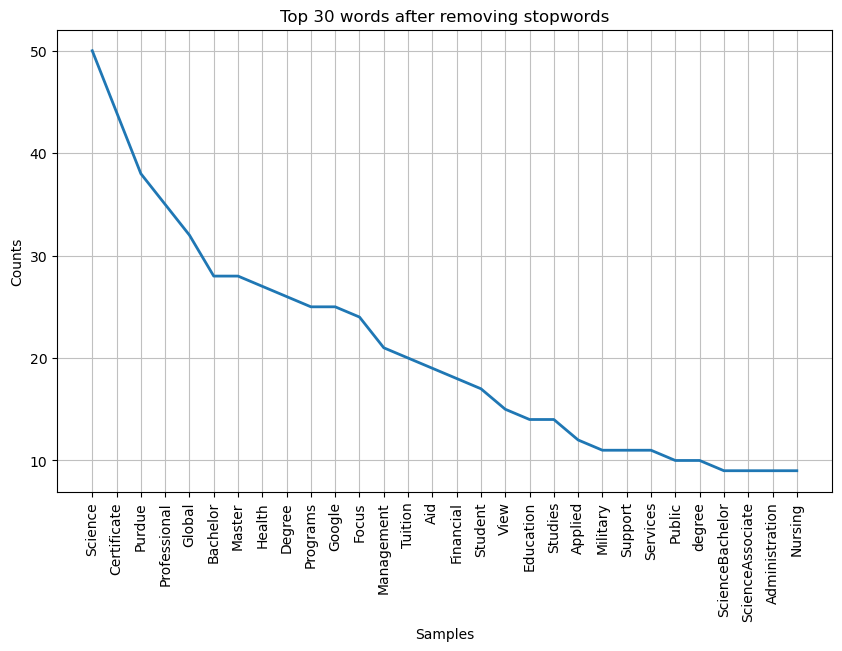

<Axes: title={'center': 'Top 30 words after removing stopwords'}, xlabel='Samples', ylabel='Counts'>

In [3]:
from bs4 import BeautifulSoup
import urllib.request
import ssl
import string

# Fetching and cleaning web text
context = ssl._create_unverified_context()
response = urllib.request.urlopen('https://www.purdueglobal.edu/', context=context)
html = response.read()
text = BeautifulSoup(html, "html.parser").get_text()
text = text.translate(str.maketrans('', '', string.punctuation))

# Tokenizing text
tokens = word_tokenize(text)
word_freq = nltk.FreqDist(tokens)

# Removing stopwords
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
filtered_freq = nltk.FreqDist(filtered_tokens)

# Plotting
plt.figure(figsize=(10, 6))
filtered_freq.plot(30, title='Top 30 words after removing stopwords')


In [5]:
import nltk
from nltk.tokenize import sent_tokenize

# Specify the correct path to the Spanish text file on your desktop
spanish_text_file = '/Users/jackgorsuch/Desktop/spanish-text.txt'

# Load and read the Spanish text
with open(spanish_text_file, 'r', encoding='utf-8') as file:
    spanish_text = file.read()

# Print the Spanish text to verify it's loaded correctly
print("Loaded Spanish Text:\n", spanish_text[:500])  # Prints first 500 characters

# Tokenize the Spanish text into sentences
spanish_sentences = sent_tokenize(spanish_text, language='spanish')
print("\nTokenized Sentences:\n", spanish_sentences[:5])  # Prints first 5 sentences


Loaded Spanish Text:
 Hoy es un día perfecto. ¿Sabes por qué? Porque hoy hay tarta de postre.
Efectivamente, me gusta comer dulces. Por eso estoy tan contento.
Yo vivo solo y nunca compro tartas o dulces. Como postre solo un día a la semana.
Todos los miércoles, ceno en casa de mis padres y mi madre hace una tarta.

Tokenized Sentences:
 ['Hoy es un día perfecto.', '¿Sabes por qué?', 'Porque hoy hay tarta de postre.', 'Efectivamente, me gusta comer dulces.', 'Por eso estoy tan contento.']


In [13]:
import nltk
from nltk.corpus import wordnet

# Define the function to find synonyms
def find_synonyms(word):
    synonyms = set()  # Use a set to avoid duplicate entries
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())  
    return list(synonyms)  

# Define the function to find antonyms
def find_antonyms(word):
    antonyms = set()  # Use a set to avoid duplicate entries
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():  # Check if antonyms are available
                antonyms.add(lemma.antonyms()[0].name())  # Add the antonyms
    return list(antonyms)  

# Example usage
word = "happy"  
synonyms = find_synonyms(word)
antonyms = find_antonyms(word)

# Display the results
print("Synonyms of '{}': {}".format(word, synonyms))
print("Antonyms of '{}': {}".format(word, antonyms))


Synonyms of 'happy': ['glad', 'happy', 'well-chosen', 'felicitous']
Antonyms of 'happy': ['unhappy']
